In [101]:
import math as math
import matplotlib.pyplot as plt

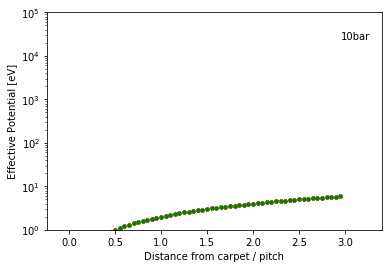

In [119]:
#position
x = -.00050 #(m)
y = 0.00005 #(m)
aa = []
bb = []
C=["black","blue","red","yellow","purple","orange","green"]
i=0
plt.figure()
plt.ylabel('Effective Potential [eV]')
plt.xlabel('Distance from carpet / pitch')
plt.text(.9,.9,'200mbar', ha='center',va='center',transform=ax.transAxes)
plt.ylim(1,10**5)
plt.xlim(-.24,3.4)
ax = plt.gca()
ax.set_yscale('log')

while x<.0005:
    while y<.003:
        a = .001 #pitch in m
        yr = y/a #unitless
        xr = x/a
        gamma = .2
        V = 200 #electrode voltage
        Ep = 2000*y #push field
        q = 1.6021765*10**(-19) #charge of ion
        p = 150.01234 #pressure in torr
        p0 = 760 #standard pressure
        T = 300 #temperature in Kelvin
        T0 = 273.15 #standard temperature
        mi = 6.64216e-26 #mass of ion
        Omega = 2*math.pi*10**6 #angular frequency in Hz
        K0 = .0022 #reduced mobility in m^2/s/V
        D = q/mi*1/K0*p/p0*T0/T # damping constant in Hz
        Dy = Ep*y + 1/(Omega**2 + D**2)*(q/4*mi)*(8*V/(gamma*a*math.pi))**2*math.sin(math.pi*gamma/2)**2*math.exp(-2*math.pi*y/a);
        ymin = -a/(2*math.pi)*math.log((Ep*a*(Omega**2+D**2))*(math.pi/(8*math.sin(math.pi*gamma/2)**2))*(mi/q)*(gamma*a/(2*V))**2) #position of potential minimum

        #math shortcuts
        Shy = math.sinh(math.pi*yr)
        Chy = math.cosh(math.pi*yr)
        Sxminus = math.sin(math.pi*(xr-(gamma/2)))
        Sxplus = math.sin(math.pi*(xr+(gamma/2)))
        Cxminus = math.cos(math.pi*(xr-(gamma/2)))
        Cxplus = math.cos(math.pi*(xr+(gamma/2)))

        #field definitions
        Ex = (V/(gamma*a*math.pi))*(math.atan(Cxminus/Shy)-math.atan(Cxplus/Shy))
        #Ey = (V/(2*gamma*a*pi))*log((Chy+Sxplus)*(Chy-Sxminus)/((Chy-Sxplus)*(Chy+Sxminus))) #(V/m)actual formula
        Ey = ((8*V)/(gamma*a*math.pi)*math.sin((math.pi*gamma/2))*math.exp(-(math.pi)*yr)) #approximation

        #Time-averaged effective potential
        Veff = q*((Ex**2 + Ey**2)/(4*mi*Omega**2))
        Veffdamp = (Veff*Omega**2)/(Omega**2 + D**2)+Ep

        aa.append(y/a)
        bb.append(Veffdamp)
        y+=.00005
    plt.scatter(aa,bb,c=C[i],s=10)   
    bb=[]
    aa=[]
    x+=.000166666
    i+=1
    y=.00005
plt.show()

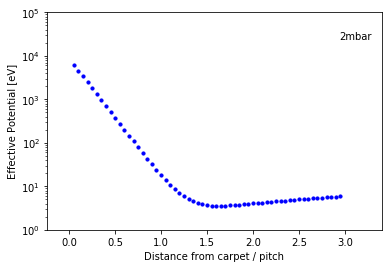

In [55]:
#plt.figure()
#plt.scatter(aa,bb,c="blue",s=10)    
#plt.ylabel('Effective Potential [eV]')
#plt.xlabel('Distance from carpet / pitch')
#plt.text(.9,.9,'2mbar', ha='center',va='center',transform=ax.transAxes)
#plt.ylim(1,10**5)
#plt.xlim(-.24,3.4)
#ax = plt.gca()
#ax.set_yscale('log')

plt.show()